In [30]:
import os

recording_location = '/home/pestilli/Desktop/antonio/dotmot_py/data/testing_001_2022-11-08_13h44.57.546/000'

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)

000/
    annotation.pldata
    annotation_timestamps.npy
    blinks.pldata
    blinks_timestamps.npy
    eye0.intrinsics
    eye0.mp4
    eye0_lookup.npy
    eye0_timestamps.npy
    fixations.pldata
    fixations_timestamps.npy
    gaze.pldata
    gaze_timestamps.npy
    info.player.json
    notify.pldata
    notify_timestamps.npy
    pupil.pldata
    pupil_timestamps.npy
    surface_definitions_v01
    surfaces.pldata
    surfaces_timestamps.npy
    user_info.csv
    world.intrinsics
    world.mp4
    world_lookup.npy
    world_timestamps.npy
    exports/
        000/
            export_info.csv
            gaze_positions.csv
            pupil_gaze_positions_info.txt
            pupil_positions.csv
            world.mp4.canceled
    offline_data/
        fixations.meta
        fixations.pldata
        fixations_stop_timestamps.npy
        fixations_timestamps.npy
        tokens/
            fixations_producer_Offline_Fixation_Detector.token
            gaze_positions_consumer_Offline_

In [31]:
import pandas as pd
exported_gaze_csv = os.path.join(recording_location, 'exports', '000', 'gaze_positions.csv')
gaze_pd_frame = pd.read_csv(exported_gaze_csv)
print("Columns present in pupil data:")
list(gaze_pd_frame.columns)

Columns present in pupil data:


['gaze_timestamp',
 'world_index',
 'confidence',
 'norm_pos_x',
 'norm_pos_y',
 'base_data',
 'gaze_point_3d_x',
 'gaze_point_3d_y',
 'gaze_point_3d_z',
 'eye_center0_3d_x',
 'eye_center0_3d_y',
 'eye_center0_3d_z',
 'gaze_normal0_x',
 'gaze_normal0_y',
 'gaze_normal0_z',
 'eye_center1_3d_x',
 'eye_center1_3d_y',
 'eye_center1_3d_z',
 'gaze_normal1_x',
 'gaze_normal1_y',
 'gaze_normal1_z']

### exclude gaze data before experiment star_time

In [32]:
from IPython.display import display
x = 21 # skip first X seconds to allow for experiment startup
start_time = gaze_pd_frame.gaze_timestamp.iloc[0] + x
gaze_pd_frame = gaze_pd_frame[gaze_pd_frame.gaze_timestamp > start_time]
pd.options.display.float_format = '{:.3f}'.format

display(gaze_pd_frame[['gaze_timestamp', 'confidence', 'norm_pos_x', 'norm_pos_y']])

,gaze_timestamp,confidence,norm_pos_x,norm_pos_y
2489,9873.434,1.000,0.451,0.607
2490,9873.443,1.000,0.457,0.609
2491,9873.451,0.971,0.458,0.609
2492,9873.460,1.000,0.459,0.607
2493,9873.468,0.952,0.459,0.605
...,...,...,...,...
9541,9932.680,0.909,0.466,0.609
9542,9932.688,0.838,0.466,0.608
9543,9932.697,0.827,0.467,0.608
9544,9932.705,0.890,0.468,0.608


### Check what a ~1.5deg jitter window looks like for fixation 

In [ ]:
# set screen parameters [CRT]
screen_width = 38 #cm
viewing_distance = 57 #cm
resolution = [1024, 768] #x-pix/y-pix
# set angular radius for jitter
ang = 1.5 # degrees of visual angle (dva)
# convert from degrees of visual angle to pixel coordinates
import numpy
pixSize=screen_width/resolution[0]
sz=2*viewing_distance*numpy.arctan(numpy.pi*ang/(2*180))
pix = numpy.round(sz/pixSize)

#convert from pix to norm units on screen
x_jitter = 40/resolution[0]
y_jitter = 40/resolution[1]

### Plot pupil positions

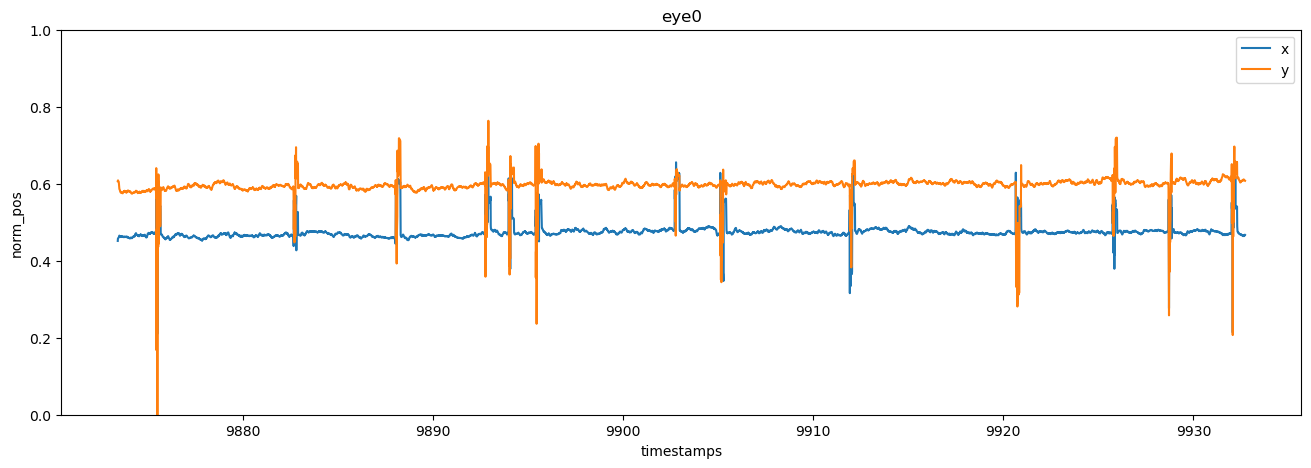

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 5))
plt.plot(gaze_pd_frame['gaze_timestamp'], gaze_pd_frame['norm_pos_x'])
plt.plot(gaze_pd_frame['gaze_timestamp'], gaze_pd_frame['norm_pos_y'])
plt.xlabel('timestamps')
plt.ylabel('norm_pos')
plt.ylim([0, 1])
plt.title('eye0')
plt.legend("xy")

### Remove low confidence timestamps

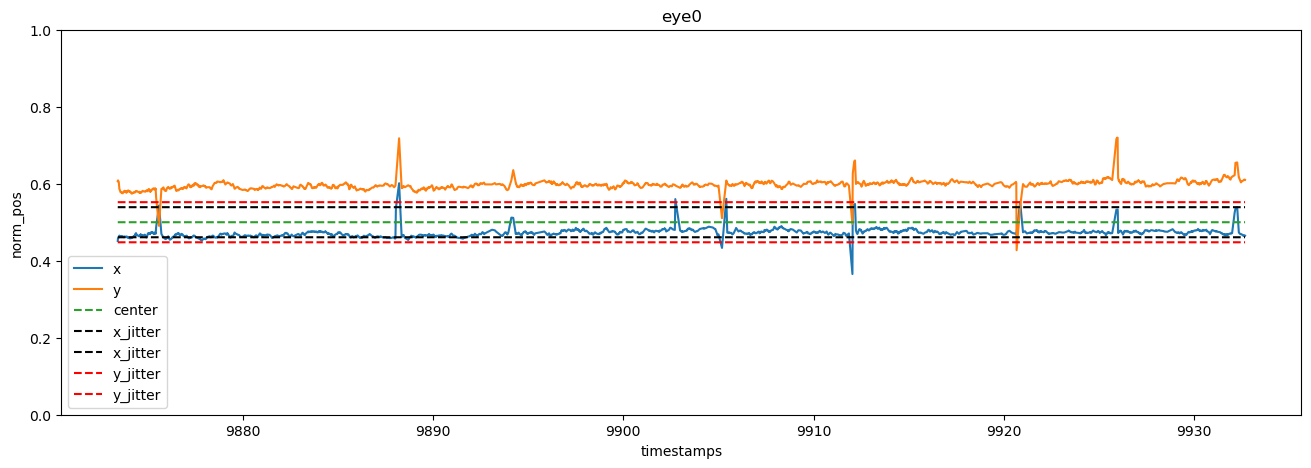

In [59]:
import numpy.matlib
eye0_high_conf_df = gaze_pd_frame[gaze_pd_frame['confidence'] > 0.95]
plt.figure(figsize=(16, 5))
plt.plot(eye0_high_conf_df['gaze_timestamp'], eye0_high_conf_df['norm_pos_x'],label='x')
plt.plot(eye0_high_conf_df['gaze_timestamp'], eye0_high_conf_df['norm_pos_y'],label='y')
plt.plot(eye0_high_conf_df['gaze_timestamp'], numpy.matlib.repmat(0.5,len(eye0_high_conf_df['gaze_timestamp']),1),'--',label='center')
plt.plot(eye0_high_conf_df['gaze_timestamp'], numpy.matlib.repmat(0.5+x_jitter,len(eye0_high_conf_df['gaze_timestamp']),1),'--',color='black',label='x_jitter')
plt.plot(eye0_high_conf_df['gaze_timestamp'], numpy.matlib.repmat(0.5-x_jitter,len(eye0_high_conf_df['gaze_timestamp']),1),'--',color='black',label='x_jitter')
plt.plot(eye0_high_conf_df['gaze_timestamp'], numpy.matlib.repmat(0.5+y_jitter,len(eye0_high_conf_df['gaze_timestamp']),1),'--',color='red',label='y_jitter')
plt.plot(eye0_high_conf_df['gaze_timestamp'], numpy.matlib.repmat(0.5-y_jitter,len(eye0_high_conf_df['gaze_timestamp']),1),'--',color='red',label='y_jitter')

plt.xlabel('timestamps')
plt.ylabel('norm_pos')
plt.ylim([0, 1])
plt.title('eye0')
plt.legend()

### Visualize in scatter 

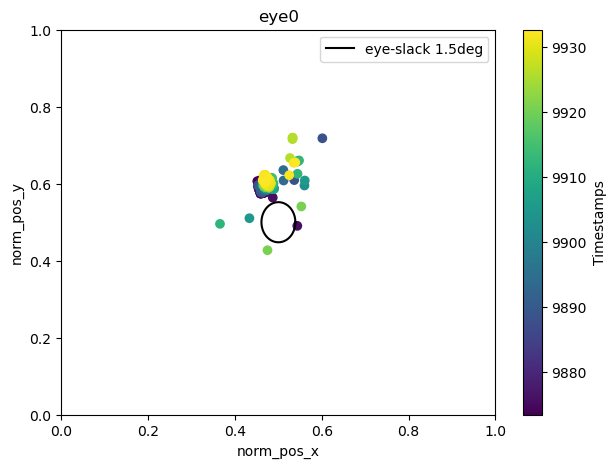

In [54]:
# draw fixation jitter radius
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=0.5     #x-position of the center
v=0.5    #y-position of the center
a=x_jitter     #radius on the x-axis
b=y_jitter    #radius on the y-axis

plt.figure(figsize=(7, 5))
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t),color='black',label='eye-slack 1.5deg')

# plot fixation + ellipsis (jitter radius)
plt.scatter(eye0_high_conf_df['norm_pos_x'], eye0_high_conf_df['norm_pos_y'], c=eye0_high_conf_df['gaze_timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0')
plt.legend()